In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_excel('final_feat.xlsx')

In [96]:
df.head()

,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,...,Total Jobs,Avg Service,Avg Install,Canceled Jobs_y,Turn over %,Canceled %,Avg Sales,bookedjob,totalcalls,Booking rate
0,Thursday,3181.56,13361,156,0.0117,20.39,26.77,0.0486,118.86,0.5337,...,101,143.417833,3224.412750,8,9.900990,7.920792,3617.444828,49,155,31.612903
1,Friday,2684.67,16841,160,0.0095,16.78,21.00,0.0299,127.84,0.5477,...,89,75.515208,965.365854,7,10.112360,7.865169,1781.345385,56,176,31.818182
2,Saturday,1338.36,30788,142,0.0046,9.43,11.00,0.0186,121.67,0.5297,...,31,110.019048,1377.666667,4,9.677419,12.903226,459.248750,30,92,32.608696
3,Sunday,1192.31,12865,108,0.0084,11.04,5.00,0.0130,238.46,0.5741,...,15,67.914286,406.250000,1,13.333333,6.666667,846.000000,11,52,21.153846
4,Monday,2383.17,49514,188,0.0038,12.68,22.00,0.0566,108.33,0.6027,...,91,78.753750,1646.943488,5,8.791209,5.494505,1820.060789,54,159,33.962264


In [97]:
df['Created Date']

0     2020-01-02
1     2020-01-03
2     2020-01-04
3     2020-01-05
4     2020-01-06
         ...    
345   2021-01-31
346   2021-02-01
347   2021-02-02
348   2021-02-03
349   2021-02-04
Name: Created Date, Length: 350, dtype: datetime64[ns]

In [99]:
df1=df[['Completed Jobs', 'Total Leads','tech_count','Income_y','bookedjob', 'Total Jobs ','Lead Calls','TMAX',
        'Avg Install']]

In [100]:
df1.head()

,Completed Jobs,Total Leads,tech_count,Income_y,bookedjob,Total Jobs,Lead Calls,TMAX,Avg Install
0,57,10,59,23933.54,49,101,60,65,3224.412750
1,77,9,40,65232.03,56,89,64,71,965.365854
2,55,3,21,26195.32,30,31,58,69,1377.666667
3,6,2,9,264.00,11,15,32,69,406.250000
4,73,8,60,48506.16,54,91,62,77,1646.943488


<AxesSubplot:>

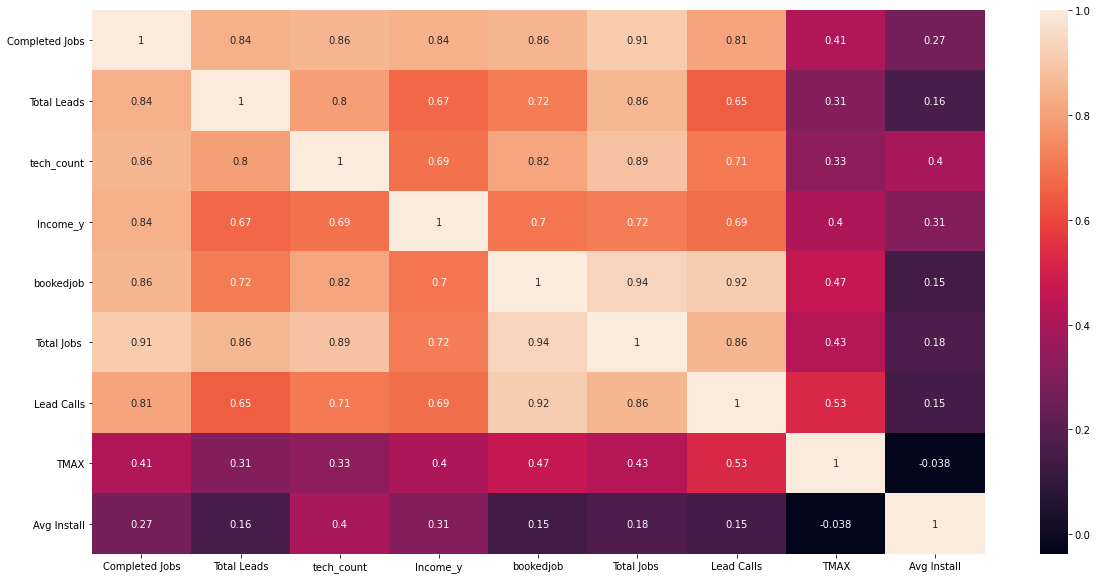

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [102]:
train.isnull().sum()

Completed Jobs    0
Total Leads       0
tech_count        0
bookedjob         0
TMAX              0
Lead Calls        0
Total Jobs        0
Avg Install       0
Avg Sales         0
Income_y          0
dtype: int64

In [103]:
train=df1[0:300]
test=df1[300:]

In [104]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [105]:
from sklearn.ensemble import ExtraTreesRegressor
reg= ExtraTreesRegressor()


In [107]:
reg= ExtraTreesRegressor()


In [108]:
reg.fit(X,y)

ExtraTreesRegressor()

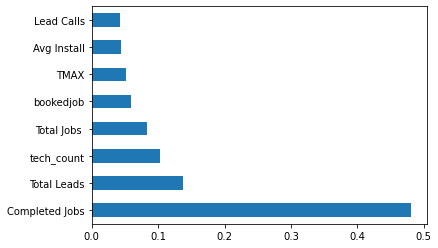

In [109]:
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [110]:
train.head()

,Completed Jobs,Total Leads,tech_count,Income_y,bookedjob,Total Jobs,Lead Calls,TMAX,Avg Install
0,57,10,59,23933.54,49,101,60,65,3224.412750
1,77,9,40,65232.03,56,89,64,71,965.365854
2,55,3,21,26195.32,30,31,58,69,1377.666667
3,6,2,9,264.00,11,15,32,69,406.250000
4,73,8,60,48506.16,54,91,62,77,1646.943488


In [111]:
test.head()

,Completed Jobs,Total Leads,tech_count,Income_y,bookedjob,Total Jobs,Lead Calls,TMAX,Avg Install
300,6,4,12,176.00,17,33,30,68,0.000000
301,111,32,39,114534.21,53,114,67,63,2062.083333
302,131,40,61,127412.10,59,140,74,72,1688.327612
303,131,40,61,127412.10,59,140,74,72,1688.327612
304,131,40,61,127412.10,59,140,74,72,1688.327612


In [112]:
#test.drop_duplicates(subset ="Income_y",keep ='first', inplace = True)

In [113]:
test.head()

,Completed Jobs,Total Leads,tech_count,Income_y,bookedjob,Total Jobs,Lead Calls,TMAX,Avg Install
300,6,4,12,176.00,17,33,30,68,0.000000
301,111,32,39,114534.21,53,114,67,63,2062.083333
302,131,40,61,127412.10,59,140,74,72,1688.327612
303,131,40,61,127412.10,59,140,74,72,1688.327612
304,131,40,61,127412.10,59,140,74,72,1688.327612


In [114]:
train.shape

(300, 9)

In [115]:
test.shape

(50, 9)

In [116]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [119]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [120]:
regressor.score(X_train,y_train)

-0.0001483897927698763

In [121]:
regressor.score(X_test,y_test)

-0.03054236589637349

In [148]:
y_

300       176.00
301    114534.21
302    127412.10
303    127412.10
304    127412.10
305    127412.10
306     73107.94
307    100335.70
308     82920.44
309     36992.00
310       326.00
311     86287.17
312     79380.38
313    104509.01
314     96828.96
315    108327.11
316     99625.26
317     76878.35
318     69089.17
319    128210.29
320    177410.42
321     68424.71
322    130406.40
323     41651.85
324       102.95
325    121328.92
326     94156.55
327     93428.49
328     73106.96
329     62484.03
330     50088.00
331     45289.92
332     95437.44
333    100674.86
334     55735.08
335     86421.80
336     86421.80
337     86421.80
338     86421.80
339     41343.95
340     15788.00
341    128985.55
342     93402.16
343    176747.02
344     32502.40
345     55111.85
346    133042.85
347     88538.89
348     66133.39
349     67090.81
Name: Income_y, dtype: float64

In [123]:
X_.isnull().sum()

Completed Jobs    0
Total Leads       0
tech_count        0
bookedjob         0
Total Jobs        0
Lead Calls        0
TMAX              0
Avg Install       1
dtype: int64

In [124]:
X_['Avg Install']=X_['Avg Install'].fillna(2298.813953488)

In [127]:
y_=test['Income_y']

In [129]:
regressor.score(X_,y_)

-0.11411185867533513

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = 5)
svr.fit(X, y)

Tuning hyper-parameters


GridSearchCV(cv=5, estimator=SVR(epsilon=0.01),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.6,
                                    0.9],
                          'kernel': ['rbf']}])

In [132]:
print("Grid scores on training set:")
means = svr.cv_results_['mean_test_score']
stds = svr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

Grid scores on training set:
-0.899 (+/-2.309) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
-0.898 (+/-2.307) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.899 (+/-2.308) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-0.899 (+/-2.309) for {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'}
-0.899 (+/-2.309) for 

In [133]:
tuned_svm = SVR(C=10000,gamma=0.9,kernel='rbf')

In [134]:
tuned_svm.fit(X_train,y_train)

SVR(C=10000, gamma=0.9)

In [135]:
tuned_svm.score(X_train,y_train)

0.22203950353490376

In [137]:
tuned_svm.score(X_test,y_test)

-0.020861616605779343

In [138]:
tuned_svm.score(X_,y_)

-0.10211323304460351

In [494]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pre_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pre_2))

RMSE: 31264.167605431492
MAE: 24372.559223004737


In [147]:
y_test

203    230792.70
266    108748.26
152     66762.95
9       82829.20
233      1177.00
226        88.00
196     99848.00
109    174312.82
5       15559.70
175    146926.60
237     82783.43
57     101549.87
218    163633.73
45      57492.01
182    114291.01
221    122055.15
289     65586.82
211    224599.52
148    117944.52
165    169570.29
78      58625.09
113    161085.18
249     21892.41
250     78196.40
104    189499.97
42       4160.38
281     65246.20
295    140165.21
157    128854.58
238    107946.73
17      47084.97
164    119772.30
33      53270.20
24      43624.52
215    153349.31
119     94827.11
7        6106.40
90      89839.02
46      33484.65
73      64872.84
93      56046.66
76      31645.96
286      1001.00
60      24049.75
77      24089.00
63        505.40
234     98740.35
229    129130.84
111    129523.98
231    147099.97
180     78401.04
144      2925.69
239      2014.00
75        314.00
297     83864.72
278    115265.51
97      47022.53
92      65573.29
192    294546.